Estimating the income of individuals

Imports

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# conda install -c anaconda xlrd 

In [3]:
# conda install -c anaconda openpyxl 

In [4]:
df = pd.read_excel("income_assessment.xlsx")

In [5]:
df.head(10)

,Transaction ID,Customer ID,Value,account_type,memo,Category,Date
0,1,AA1001,40.00,Checking,Credit - MoneySend - Goo*Pay Mountain ViewCAUS...,Misc Inflows,2018-05-08
1,2,AA1001,-14.12,Checking,Debit PIN Purchase - GAMESTOP #2497 6939 EASBE...,Entertainment,2017-12-26
2,3,AA1001,310.00,Checking,"Deposit 11:15a #5758 - Citibank ATM 7105 E AV,...",ATM/Cash,2017-08-08
3,4,AA1001,10.03,Checking,Credit - MoneySend - SQC*Bianca Ortega San Fra...,Misc Inflows,2018-03-20
4,5,AA1001,-10.98,Checking,Debit Card Purchase 09/29 08:24p #5758 - MCDON...,Food and Beverages,2017-10-03
5,6,AA1001,300.00,Checking,Credit - MoneySend - Goo*Pay Mountain ViewCAUS...,Misc Inflows,2018-05-23
6,7,AA1001,-10.00,Checking,Debit Card Purchase 05/22 11:31a #5758 - ABC*P...,Personal Care,2018-05-24
7,8,AA1001,-1.36,Checking,Debit Card Purchase 07/14 02:38p #5758 - PAYPA...,Travel,2017-07-18
8,9,AA1001,-3.27,Checking,Debit Card Purchase 01/30 10:29p #5758 - HP *I...,Uncategorized,2018-02-02
9,10,AA1001,-4.00,Checking,Mobile Purchase Sign Based 07/29 08:45p #5758 ...,Food and Beverages,2017-08-01


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82796 entries, 0 to 82795
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Transaction ID  82796 non-null  int64         
 1   Customer ID     82796 non-null  object        
 2   Value           82796 non-null  float64       
 3   account_type    82796 non-null  object        
 4   memo            82796 non-null  object        
 5   Category        79007 non-null  object        
 6   Date            82796 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 4.4+ MB


In [7]:
df.shape

(82796, 7)

In [8]:
df.Date

0       2018-05-08
1       2017-12-26
2       2017-08-08
3       2018-03-20
4       2017-10-03
           ...    
82791   2018-03-22
82792   2017-10-26
82793   2017-06-28
82794   2017-05-04
82795   2017-10-26
Name: Date, Length: 82796, dtype: datetime64[ns]

Let's look to see if we have any missing values

In [9]:
df.isna().sum()

Transaction ID       0
Customer ID          0
Value                0
account_type         0
memo                 0
Category          3789
Date                 0
dtype: int64

Looks like we do. That is good to know. We remember that for when we look at transactions individually.

In [10]:
no_of_customers = df["Customer ID"].nunique()
print(no_of_customers)

94


We have 94 unique customer ids which corresponds to 94 customers

Lets just look at one individual

In [11]:
one_customer = df[df["Customer ID"] == "AA1001"]
print(len(one_customer))
one_customer.head()

3711


,Transaction ID,Customer ID,Value,account_type,memo,Category,Date
0,1,AA1001,40.00,Checking,Credit - MoneySend - Goo*Pay Mountain ViewCAUS...,Misc Inflows,2018-05-08
1,2,AA1001,-14.12,Checking,Debit PIN Purchase - GAMESTOP #2497 6939 EASBE...,Entertainment,2017-12-26
2,3,AA1001,310.00,Checking,"Deposit 11:15a #5758 - Citibank ATM 7105 E AV,...",ATM/Cash,2017-08-08
3,4,AA1001,10.03,Checking,Credit - MoneySend - SQC*Bianca Ortega San Fra...,Misc Inflows,2018-03-20
4,5,AA1001,-10.98,Checking,Debit Card Purchase 09/29 08:24p #5758 - MCDON...,Food and Beverages,2017-10-03


In [12]:
# Aggregating only the deposits
one_customer_deposits = one_customer[one_customer["Value"] > 0]
one_customer_deposits.shape

(724, 7)

In [13]:
one_customer_deposits.head()

,Transaction ID,Customer ID,Value,account_type,memo,Category,Date
0,1,AA1001,40.00,Checking,Credit - MoneySend - Goo*Pay Mountain ViewCAUS...,Misc Inflows,2018-05-08
2,3,AA1001,310.00,Checking,"Deposit 11:15a #5758 - Citibank ATM 7105 E AV,...",ATM/Cash,2017-08-08
3,4,AA1001,10.03,Checking,Credit - MoneySend - SQC*Bianca Ortega San Fra...,Misc Inflows,2018-03-20
5,6,AA1001,300.00,Checking,Credit - MoneySend - Goo*Pay Mountain ViewCAUS...,Misc Inflows,2018-05-23
11,12,AA1001,333.85,Checking,Zelle Credit - PAY ID:JPM140610591 ORG ID:JPM ...,Misc Inflows,2017-12-21


In [14]:
one_customer_deposits.Category.unique()

array(['Misc Inflows', 'ATM/Cash', 'Paychecks/Salary', 'Account Transfer',
       'Uncategorized', 'General Merchandise', 'Travel'], dtype=object)

In [15]:
# Aggregate the transactions by Paychecks/Salary
one_customer_salary = one_customer_deposits[one_customer_deposits.Category == 'Paychecks/Salary'].sort_values("Date")
one_customer_salary.shape

(127, 7)

In [16]:
one_customer_salary.head()

,Transaction ID,Customer ID,Value,account_type,memo,Category,Date
2273,2274,AA1001,353.45,Checking,VENSURE HR INC PAYROLL PPD ID: 1200455785 ACH_...,Paychecks/Salary,2016-08-12
32032,32033,AA1001,353.45,Checking,VENSURE HR INC PAYROLL PPD ID: 1200455785 ACH_...,Paychecks/Salary,2016-08-12
1863,1864,AA1001,353.45,Checking,VENSURE HR INC PAYROLL PPD ID: 1200455785 ACH_...,Paychecks/Salary,2016-08-12
32098,32099,AA1001,367.27,Checking,VENSURE HR INC PAYROLL PPD ID: 1200455785 ACH_...,Paychecks/Salary,2016-08-19
1929,1930,AA1001,367.27,Checking,VENSURE HR INC PAYROLL PPD ID: 1200455785 ACH_...,Paychecks/Salary,2016-08-19


In [17]:
one_customer_salary = one_customer_salary.set_index('Date')

In [18]:
monthly_one_customer_salary = one_customer_salary.resample('MS').sum()
print(f"Transaction timeline: {len(monthly_one_customer_salary)} months.")
monthly_one_customer_salary

Transaction timeline: 26 months.


,Transaction ID,Value
Date,,
2016-08-01,109434,3258.99
2016-09-01,147540,4360.74
2016-10-01,147294,5092.20
2016-11-01,146025,4731.75
2016-12-01,183267,5744.22
2017-01-01,146109,4430.34
2017-02-01,109533,2032.32
2017-03-01,73008,610.17
2017-04-01,0,0.00


We have a ~10 months duration where there were no deposit transactions

Looking at the missing values

In [19]:
df_missing_values = df[df.Category.isna()]
len(df_missing_values)

3789

In [20]:
df_missing_deposits = df_missing_values[df_missing_values.Value > 0]
no_of_missing_deposits = df_missing_deposits.shape[0]
unique_customers_with_missing_deposits = df_missing_deposits["Customer ID"].nunique()
average_deposits_missing_categories = no_of_missing_deposits / unique_customers_with_missing_deposits

print(f"Number of deposits with no category value: {no_of_missing_deposits}")

print(f"Number of customers with deposits that have missing category:", unique_customers_with_missing_deposits)
print(f"On average each customer is missing {average_deposits_missing_categories:.1f} deposits from the category over 26 month period")
print(f"Average of {average_deposits_missing_categories / len(monthly_one_customer_salary):.1f} deposits per month are missing from the category column per customer")

Number of deposits with no category value: 1821
Number of customers with deposits that have missing category: 24
On average each customer is missing 75.9 deposits from the category over 26 month period
Average of 2.9 deposits per month are missing from the category column per customer


Writing a function to pull out deposits for all individuals

In [21]:
df.head()

,Transaction ID,Customer ID,Value,account_type,memo,Category,Date
0,1,AA1001,40.00,Checking,Credit - MoneySend - Goo*Pay Mountain ViewCAUS...,Misc Inflows,2018-05-08
1,2,AA1001,-14.12,Checking,Debit PIN Purchase - GAMESTOP #2497 6939 EASBE...,Entertainment,2017-12-26
2,3,AA1001,310.00,Checking,"Deposit 11:15a #5758 - Citibank ATM 7105 E AV,...",ATM/Cash,2017-08-08
3,4,AA1001,10.03,Checking,Credit - MoneySend - SQC*Bianca Ortega San Fra...,Misc Inflows,2018-03-20
4,5,AA1001,-10.98,Checking,Debit Card Purchase 09/29 08:24p #5758 - MCDON...,Food and Beverages,2017-10-03


In [22]:

def return_customer_deposits(file_path):
    """
    Takes in a excel file and returns a dictionary with keys
    as customer id and values as  pandas dataframe of deposits 
    aggregated by months and year where Category value is 
    Paychecks/Salary
    
    Parameter: 
    ----------
    file_path : path of file
    
    Returns: 
    --------
    customer_deposits_dictionary : Keys are customer id and values 
                                pandas dataframe of deposits 
                                aggregated by months and year where 
                                Category value is Paychecks/Salary
                                
    
    """
    
    data = pd.read_excel(file_path)
    unique_customers = data["Customer ID"].unique()
    customer_deposits_dictionary = {}

    for idx, customer in enumerate(unique_customers):
        customer_data = df[df["Customer ID"] == customer]
        customer_deposit = customer_data[customer_data["Value"] > 0]
        customer_salary_deposit = customer_deposit[customer_deposit.Category == 'Paychecks/Salary'].sort_values("Date")
        customer_salary_deposit = customer_salary_deposit.set_index('Date')
        monthly_customer_salary = customer_salary_deposit.resample('MS').sum()

        customer_deposits_dictionary[f"{customer}"] = monthly_customer_salary
    
    return customer_deposits_dictionary 


customer_deposits_dictionary = return_customer_deposits("income_assessment.xlsx")

assert len(customer_deposits_dictionary) == df["Customer ID"].nunique()


In [23]:
customer_deposits_dictionary.keys()

dict_keys(['AA1001', 'AA1034', 'AA1056', 'AA1066', 'AA1067', 'AA1071', 'AA1123', 'AA1133', 'AA1142', 'AA1162', 'AA1169', 'AA1242', 'AA1224', 'AA1225', 'AA1238', 'AA1276', 'AA1291', 'AA1301', 'AA1307', 'AA1312', 'AA1330', 'AA1382', 'AA1401', 'AA1394', 'AA1396', 'AA1418', 'AA1419', 'AA1455', 'AA1480', 'AA1478', 'AA1520', 'AA1521', 'AA485', 'AA487', 'AA516', 'AA541', 'AA546', 'AA551', 'AA554', 'AA555', 'AA557', 'AA562', 'AA564', 'AA569', 'AA573', 'AA575', 'AA579', 'AA582', 'AA581', 'AA586', 'AA588', 'AA592', 'AA598', 'AA595', 'AA597', 'AA600', 'AA601', 'AA604', 'AA607', 'AA608', 'AA611', 'AA614', 'AA616', 'AA618', 'AA619', 'AA622', 'AA623', 'AA629', 'AA633', 'AA634', 'AA635', 'AA638', 'AA640', 'AA645', 'AA693', 'AA694', 'AA698', 'AA704', 'AA707', 'AA736', 'AA747', 'AA756', 'AA809', 'AA796', 'AA805', 'AA812', 'AA815', 'AA832', 'AA863', 'AA896', 'AA920', 'AA916', 'AA930', 'AA982'])

In [24]:
customer_deposits_dictionary["AA1067"]

,Transaction ID,Customer ID,Value,account_type,memo,Category
Date,,,,,,


Double checking to make sure the deposits are really missing

In [25]:
(df[df["Customer ID"] == "AA1067"].Category == "Paychecks/Salary").sum()

0

In [26]:
# sanity check to make sure deposits are really missing
empty_deposits = df[df["Customer ID"] == "AA1067"]
empty_deposits[empty_deposits["Category"] == "Paychecks/Salary"]

,Transaction ID,Customer ID,Value,account_type,memo,Category,Date


Since we have values missing we will use the monthly deposits as a proxy to estimate salary.

In [27]:
def salary_estimates(deposit_dictionary):

    monthly_salary_estimate = {}
    annual_salary_estimate = {}

    for customer, monthly_deposits in customer_deposits_dictionary.items():
        if monthly_deposits["Value"].values.sum() > 0:                                                       # Filtering out the zeros deposits
            monthly_dep = monthly_deposits["Value"].values                                                   # values are nd-array
            monthly_deposit_above_zero = monthly_dep[monthly_dep > 0]                                        # filtering out zero values
            average_monthly_deposit = round(monthly_deposit_above_zero.sum() / len(monthly_deposit_above_zero), 2)
            monthly_salary_estimate[customer] = average_monthly_deposit
            annual_salary_estimate[customer] = round(average_monthly_deposit * 12, 2)
        
    return monthly_salary_estimate, annual_salary_estimate

In [28]:
monthly_salary_estimate, annual_salary_estimate = salary_estimates(customer_deposits_dictionary)

In [29]:
monthly_deposit_DataFrame = pd.DataFrame.from_dict(monthly_salary_estimate, orient='index', columns=["monthly_salary"])
monthly_deposit_DataFrame.head()

,monthly_salary
AA1001,3617.13
AA1056,7777.74
AA1066,1556.43
AA1133,4666.34
AA1142,1.00


Plotting the distribution of salary

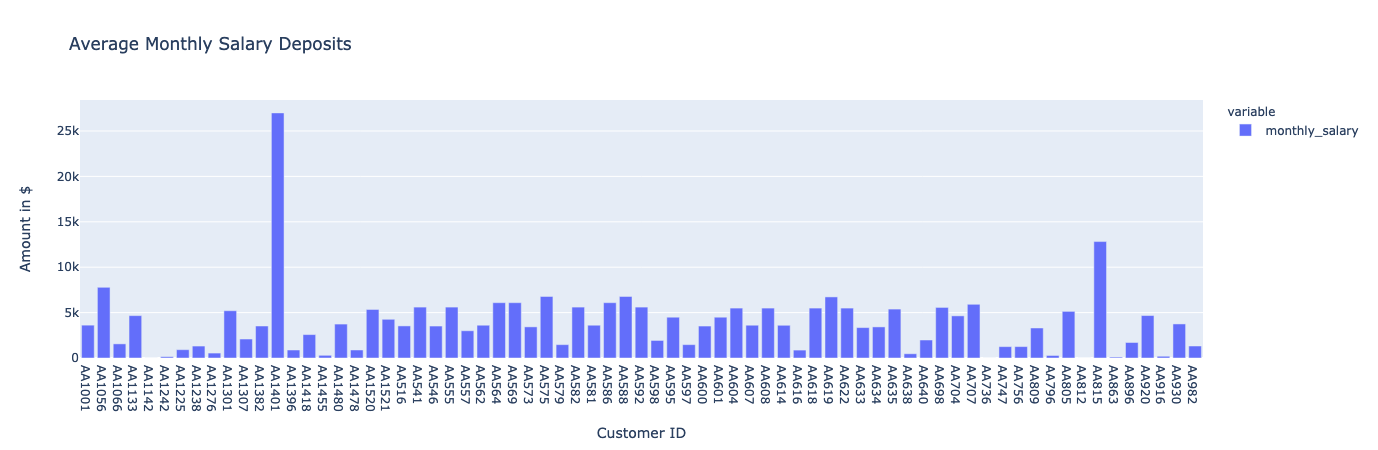

In [59]:
fig = px.bar(monthly_deposit_DataFrame, title="Average Monthly Salary Deposits", 
            labels={"value": "Amount in $", "index": "Customer ID"})
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [60]:
# ax = monthly_deposit_DataFrame.plot.bar(figsize=(20, 10), title="Average Monthly deposits", xlabel="Customer ID", ylabel="Amount in $")

In [31]:
annual_salary_DataFrame = pd.DataFrame.from_dict(annual_salary_estimate, orient='index', columns=["Annual_salary"])
annual_salary_DataFrame.head()

,Annual_salary
AA1001,43405.56
AA1056,93332.88
AA1066,18677.16
AA1133,55996.08
AA1142,12.00


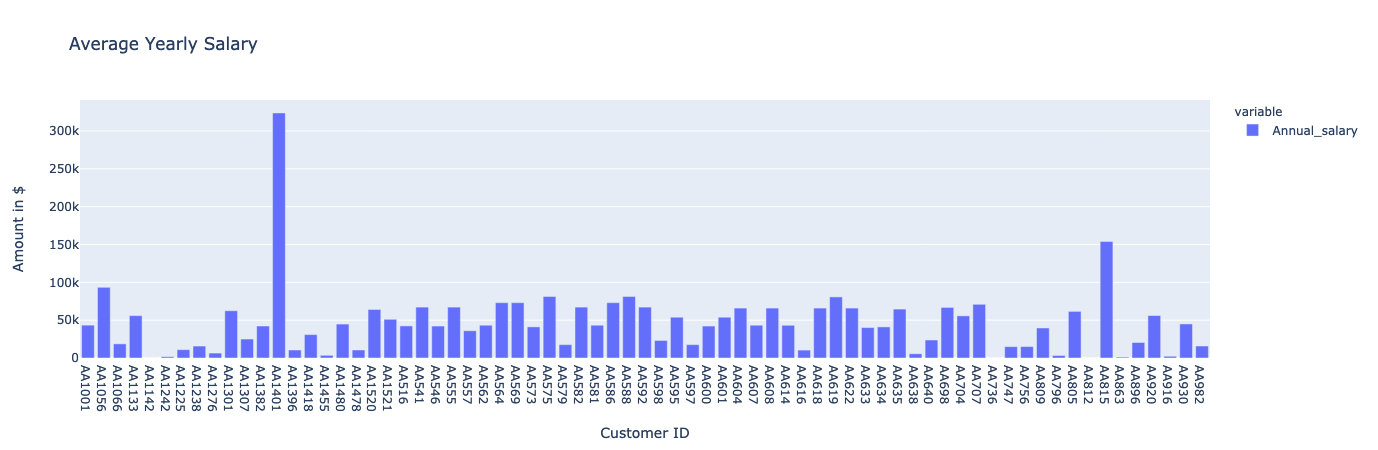

In [57]:
fig = px.bar(annual_salary_DataFrame, title="Average Yearly Salary", 
            labels={"value": "Amount in $", "index": "Customer ID"})
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [58]:
# ax = annual_salary_DataFrame.plot.bar(figsize=(20, 10), title="Average Yearly Salary", xlabel="Customer ID", ylabel="Amount in $")

Removing the outlier with 150000+ dollars annual estimated salary

Visualizing the spread

In [56]:
# annual_salary_DataFrame_without_outlier = annual_salary_DataFrame[annual_salary_DataFrame["Annual_salary"] < 150000]
# ax = annual_salary_DataFrame_without_outlier.plot.bar(figsize=(20, 10), title="Average Yearly Salary after removing outlier", xlabel="Customer ID", ylabel="Amount in $",
#                                                      )

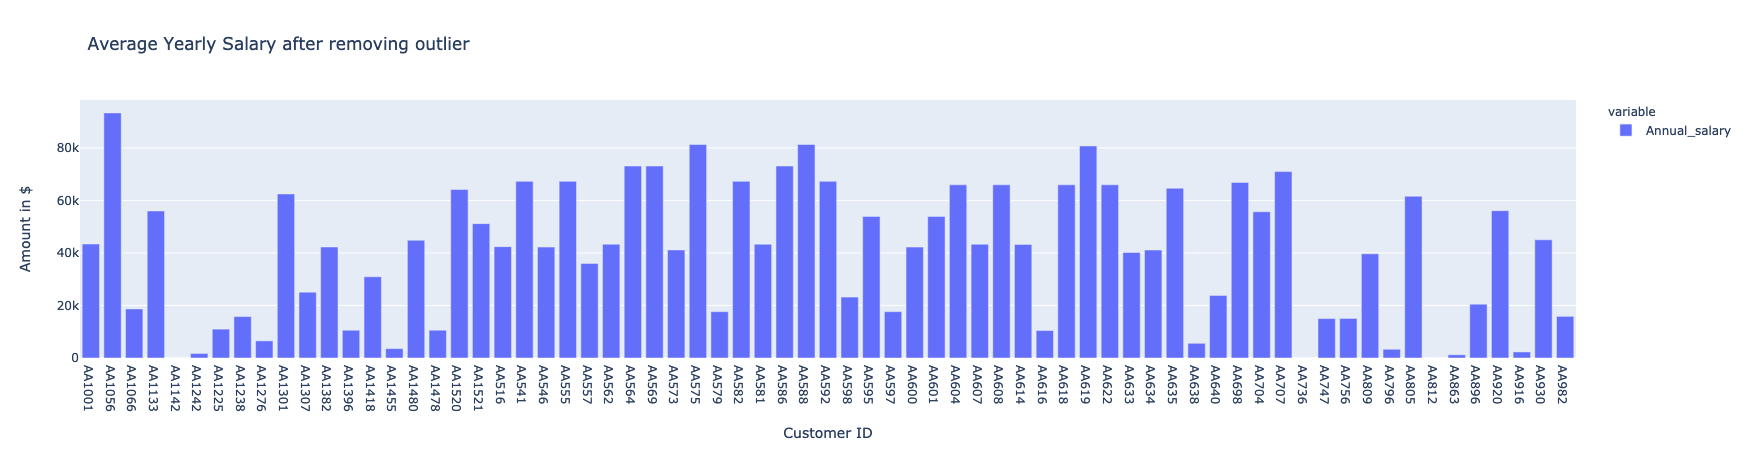

In [55]:
fig = px.bar(annual_salary_DataFrame_without_outlier, title="Average Yearly Salary after removing outlier", 
            labels={"value": "Amount in $", "index": "Customer ID"})
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [103]:
less_than_ten_thousand = {}
between_ten_thirty_thousand = {}
between_thirty_fifty = {}
between_fifty_seventy = {}
between_seventy_ninety = {}
above_ninety = {}

for customer, salary_estimate in annual_salary_estimate.items():
    if salary_estimate < 10000:
        less_than_ten_thousand[customer] = salary_estimate
    elif 10000 < salary_estimate < 30000:
        between_ten_thirty_thousand[customer] = salary_estimate
    elif 30000 < salary_estimate < 50000:
        between_thirty_fifty[customer] = salary_estimate
    elif 50000 < salary_estimate < 70000:
        between_fifty_seventy[customer] = salary_estimate
    elif 70000 < salary_estimate < 90000:
        between_seventy_ninety[customer] = salary_estimate
    else:
        above_ninety[customer] = salary_estimate

In [109]:
print(f"Crude annual salary estimates\n\n")

print(f"Customers with salaries less than $10000:")
print(f"{less_than_ten_thousand.items()}\n")
print(f"Customers with salaries between $10000 and $30000:")
print(f"{between_ten_thirty_thousand.items()}\n")
print(f"Customers with salaries between $30000 and $50000:")
print(f"{between_thirty_fifty.items()}\n")
print(f"Customers with salaries between $50000 and $70000:")
print(f"{between_fifty_seventy.items()}\n")
print(f"Customers with salaries between $70000 and $90000:")
print(f"{between_seventy_ninety.items()}\n")
print(f"Customers with salaries above $90000:")
print(f"{above_ninety.items()}")

Crude annual salary estimates


Customers with salaries less than $10000:
dict_items([('AA1142', 12.0), ('AA1242', 1730.04), ('AA1276', 6517.44), ('AA1455', 3559.92), ('AA638', 5599.2), ('AA736', 12.96), ('AA796', 3323.76), ('AA812', 3.36), ('AA863', 1230.0), ('AA916', 2307.6)])

Customers with salaries between $10000 and $30000:
dict_items([('AA1066', 18677.16), ('AA1225', 10993.44), ('AA1238', 15775.68), ('AA1307', 25069.08), ('AA1396', 10566.36), ('AA1478', 10578.96), ('AA579', 17636.76), ('AA598', 23187.12), ('AA597', 17636.76), ('AA616', 10455.84), ('AA640', 23779.2), ('AA747', 15011.88), ('AA756', 15065.28), ('AA896', 20500.68), ('AA982', 15851.4)])

Customers with salaries between $30000 and $50000:
dict_items([('AA1001', 43405.56), ('AA1382', 42269.52), ('AA1418', 30931.44), ('AA1480', 44839.68), ('AA516', 42408.84), ('AA546', 42236.4), ('AA557', 36005.88), ('AA562', 43318.92), ('AA573', 41154.48), ('AA581', 43318.92), ('AA600', 42236.4), ('AA607', 43318.92), ('AA614', 43246.08